# 2. Graficando series financieras

## Convirtiendo precios a retornos

Existen dos tipos de retornos:

* **Retornos simples:**

$$
  r_t = \frac{(P_t - P_{t-1})}{P_{t-1}} = \frac{P_t}{P_{t-1}}-1
$$

En Pandas, se puede calcular usando el método `pct_change()`. Ejemplo:


In [1]:
!pip install yfinance --quiet

import pandas as pd
import yfinance as yf

In [2]:
df = yf.download("NVDA", start = "2022-01-01", end = "2024-10-31", auto_adjust=True, multi_level_index=False)
df = df.loc[:, ["Close"]]
df.head()

[*********************100%***********************]  1 of 1 completed


,Close
Date,
2022-01-03,30.064440
2022-01-04,29.235004
2022-01-05,27.552160
2022-01-06,28.125086
2022-01-07,27.195835


In [3]:
df["simple_rtn"] = df["Close"].pct_change()
df.head()

,Close,simple_rtn
Date,,
2022-01-03,30.064440,NaN
2022-01-04,29.235004,-0.027589
2022-01-05,27.552160,-0.057563
2022-01-06,28.125086,0.020794
2022-01-07,27.195835,-0.033040


* **Retornos en logaritmos:**

$$
  r_i = \ln \left(\frac{P_t}{P_{t-1}}\right) = \ln(P_t) - \ln(P_{t-1})
$$

Para calcular estos retornos deberemos usar Numpy

In [4]:
import numpy as np

df["log_rtn"] = np.log(df["Close"] / df["Close"].shift(1))
df.head()

,Close,simple_rtn,log_rtn
Date,,,
2022-01-03,30.064440,NaN,NaN
2022-01-04,29.235004,-0.027589,-0.027976
2022-01-05,27.552160,-0.057563,-0.059286
2022-01-06,28.125086,0.020794,0.020581
2022-01-07,27.195835,-0.033040,-0.033598


## Ajustar frecuencia de la serie de tiempo

A través de Pandas, se puede cambiar la frecuencia de los datos. Para ello se usa el método `resample()`. Importante: Se puede usar este método solo si el *index* está en formato fecha. El parámetro a pasar en `resample()` puede ser:
* D: calendar day frequency
* W: weekly frequency
* ME: month end frequency
* SME: semi-month end frequency (15th and end of month)
* MS: month start frequency
* SMS: semi-month start frequency (1st and 15th)
* QE: quarter end frequency
* QS: quarter start frequency
* YE: year end frequency
* YS: year start frequency
* h: hourly frequency
* min: minutely frequency
* s: secondly frequency
* ms: milliseconds

**Datos diarios a mensuales:**

In [5]:
df_monthly = df.resample("ME").last()
df_monthly.head()

,Close,simple_rtn,log_rtn
Date,,,
2022-01-31,24.440020,0.072067,0.069588
2022-02-28,24.339209,0.009438,0.009394
2022-03-31,27.239401,-0.014590,-0.014698
2022-04-30,18.515329,-0.062430,-0.064464
2022-05-31,18.640116,-0.007389,-0.007417


**Datos diarios a semanales:**

Se puede especificar el día de la semana:
* W-SUN: weekly frequency (Sundays). Same as ‘W’
* W-MON: weekly frequency (Mondays)
* W-TUE: weekly frequency (Tuesdays)
* W-WED: weekly frequency (Wednesdays)
* W-THU: weekly frequency (Thursdays)
* W-FRI: weekly frequency (Fridays)
* W-SAT: weekly frequency (Saturdays)

In [6]:
df_weekly = df.resample("W-WED").last()
df_weekly.head()

,Close,simple_rtn,log_rtn
Date,,,
2022-01-05,27.552160,-0.057563,-0.059286
2022-01-12,27.946423,0.006543,0.006521
2022-01-19,25.019930,-0.032274,-0.032806
2022-01-26,22.729239,0.020068,0.019869
2022-02-02,25.194603,0.024515,0.024219


## Visualización de datos

Para efectos de este ejercicio, usaremos el precio de Tesla.

In [7]:
df = yf.download("TSLA", period = "3mo", auto_adjust = True, multi_level_index = False)
df

[*********************100%***********************]  1 of 1 completed


,Close,High,Low,Open,Volume
Date,,,,,
2025-07-14,316.899994,322.600006,312.670013,317.730011,78043400
2025-07-15,310.779999,321.200012,310.500000,319.679993,77556300
2025-07-16,321.670013,323.500000,312.619995,312.799988,97284800
2025-07-17,319.410004,324.339996,317.059998,323.149994,73922900
2025-07-18,329.649994,330.899994,321.420013,321.660004,94255000
...,...,...,...,...,...
2025-10-07,433.089996,452.679993,432.450012,447.820007,102296100
2025-10-08,438.690002,441.329987,425.230011,437.570007,71192100
2025-10-09,435.540009,436.350006,426.179993,431.809998,69339900


## Visualizando con Pandas

<Axes: title={'center': 'Precio de Tesla'}, xlabel='Date'>

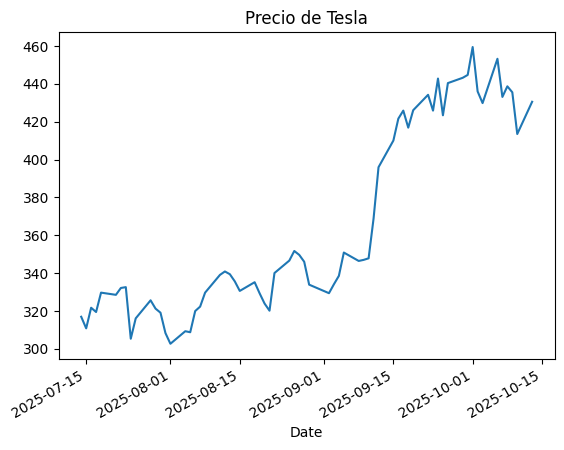

In [8]:
!pip install -U matplotlib --quiet

df["Close"].plot(title = "Precio de Tesla")

### Subplots

array([<Axes: xlabel='Date'>, <Axes: xlabel='Date'>], dtype=object)

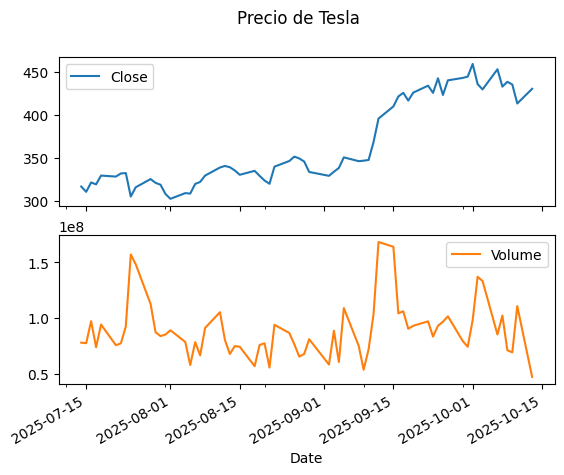

In [9]:
(df[["Close", "Volume"]].plot(subplots = True, sharex = True, title = "Precio de Tesla") )

## Visualización con matplotlib

Las celdas a continuación muestran cómo graficar datos con `matplotlib`:

La siguiente celda importa la librería `matplotlib.pyplot` y crea subplots para visualizar el precio de cierre y el volumen en gráficos separados que comparten el eje x.

La subsiguiente celda muestra cómo graficar el precio de cierre y el volumen en el mismo gráfico, pero con un eje y secundario para el volumen debido a las diferentes escalas de valores.

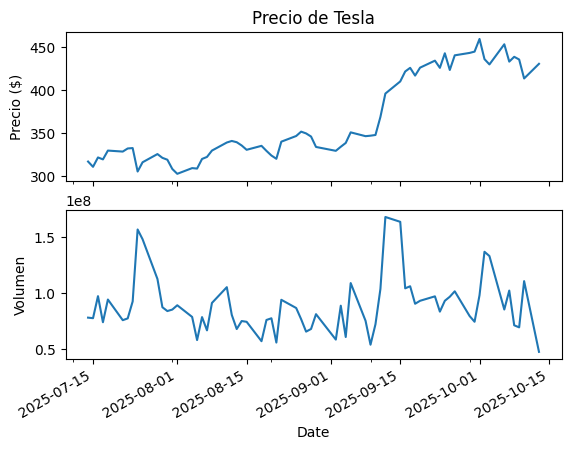

In [10]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(2, 1, sharex = True)

df["Close"].plot(ax = ax[0])
ax[0].set(title = "Precio de Tesla", ylabel = "Precio ($)")

df["Volume"].plot(ax = ax[1])
ax[1].set(ylabel = "Volumen")
# plt.savefig("grafico.png") # Para guardar imagen
plt.show()

Graficaremos close y volume en un mismo gráfico:

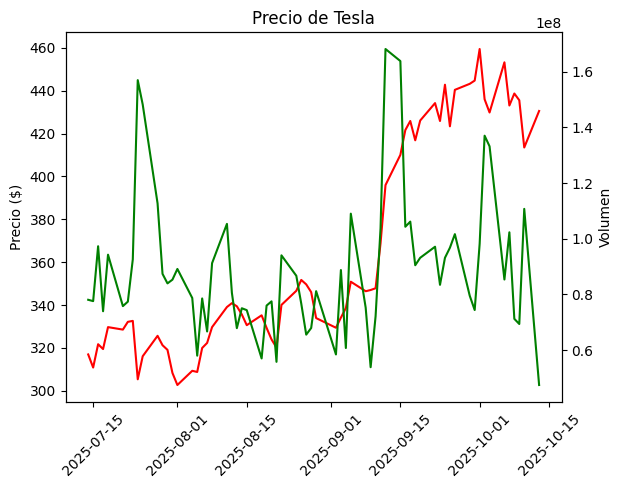

In [11]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx() #inicializa 2 series en el mismo gráfico

ax1.set(title = "Precio de Tesla", ylabel = "Precio ($)")
ax2.set(ylabel = "Volumen")
ax1.plot(df["Close"], color = "red")
ax2.plot(df["Volume"], color = "green")
ax1.xaxis.set_tick_params(rotation=45)
plt.show()



###Actividad
Grafica Open, Close, High y Low en un mismo gráfico con matplotlib


## Visualización con Seaborn

Las celdas a continuación muestran cómo preparar y visualizar datos con Seaborn:

1.  `df2 = df.copy()`: Crea una copia del DataFrame original (`df`) en una nueva variable llamada `df2`. Esto es una buena práctica para no modificar el DataFrame original al realizar transformaciones.
2.  `df2.reset_index(inplace = True)`: Convierte el índice del DataFrame (que es la fecha) en una columna regular llamada 'Date'. `inplace=True` modifica el DataFrame directamente sin crear una copia. Esto es necesario para usar Seaborn, ya que a menudo requiere que las columnas a graficar sean columnas del DataFrame y no el índice.
3.  `import seaborn as sns`: Importa la librería Seaborn.
4.  `sns.lineplot(x = "Date", y = "Close", data = df2).set(title='Precio de Tesla')`: Crea un gráfico de líneas utilizando Seaborn.
    *   `x = "Date"`: Especifica que la columna 'Date' se usará para el eje x.
    *   `y = "Close"`: Especifica que la columna 'Close' se usará para el eje y.
    *   `data = df2`: Indica que los datos provienen del DataFrame `df2`.
    *   `.set(title='Precio de Tesla')`: Establece el título del gráfico.
5.  `plt.xticks(rotation=30)`: Rota las etiquetas del eje x 30 grados para una mejor legibilidad de las fechas.

In [12]:
df2 = df.copy()

In [13]:
df2.reset_index(inplace = True) # Extrae fechas desde index hacia columna
df2

,Date,Close,High,Low,Open,Volume
0,2025-07-14,316.899994,322.600006,312.670013,317.730011,78043400
1,2025-07-15,310.779999,321.200012,310.500000,319.679993,77556300
2,2025-07-16,321.670013,323.500000,312.619995,312.799988,97284800
3,2025-07-17,319.410004,324.339996,317.059998,323.149994,73922900
4,2025-07-18,329.649994,330.899994,321.420013,321.660004,94255000
...,...,...,...,...,...,...
60,2025-10-07,433.089996,452.679993,432.450012,447.820007,102296100
61,2025-10-08,438.690002,441.329987,425.230011,437.570007,71192100
62,2025-10-09,435.540009,436.350006,426.179993,431.809998,69339900
63,2025-10-10,413.489990,443.130005,411.450012,436.540009,110712100


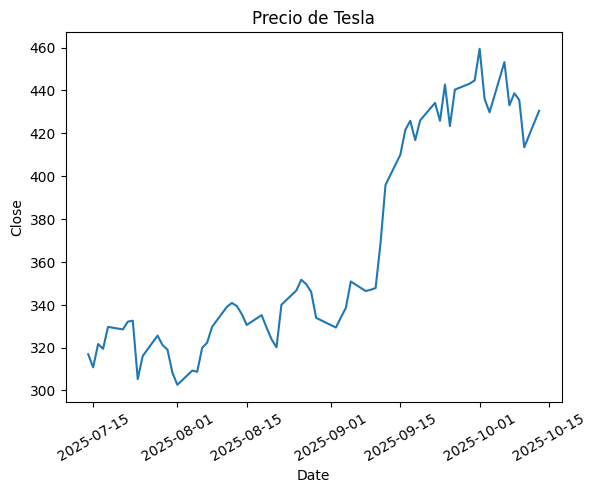

In [14]:
import seaborn as sns

sns.lineplot(x = "Date", y = "Close", data = df2).set(title='Precio de Tesla')
plt.xticks(rotation=30)
plt.show()

## Visualización con Plotly

Las celdas a continuación muestran cómo graficar datos con `Plotly`:

La primera celda importa las librerías necesarias para usar Plotly y crea un gráfico de líneas simple del precio de cierre.

La segunda celda crea un gráfico de velas (candlestick chart) utilizando los datos de Open, High, Low y Close.

La tercera celda crea un gráfico OHLC (Open-High-Low-Close) también utilizando los datos correspondientes.

In [15]:
from plotly.offline import plot
import plotly.express as px

fig = px.line(data_frame = df, y = "Close", title = "Precio TSLA")
fig.show()

In [16]:
# Velas
import plotly.graph_objects as go

fig = go.Figure(data=[go.Candlestick(x=df2['Date'],
                open=df2['Open'],
                high=df2['High'],
                low=df2['Low'],
                close=df2['Close'])])

fig.show()

In [17]:
# OHLC
import plotly.graph_objects as go

fig = go.Figure(data=[go.Ohlc(x=df2['Date'],
                open=df2['Open'],
                high=df2['High'],
                low=df2['Low'],
                close=df2['Close'])])

fig.show()

## Visualización con mplfinance

La librería `mplfinance` es una extensión de `matplotlib` diseñada específicamente para la visualización de datos financieros. Permite crear fácilmente gráficos de velas (candlestick), OHLC (Open-High-Low-Close), y añadir indicadores técnicos como medias móviles y volumen.

Las celdas a continuación muestran cómo usar `mplfinance`:

1.  La primera celda instala la librería `mplfinance`, la importa y grafica los datos utilizando el tipo de gráfico por defecto, que es el gráfico OHLC.
2.  La segunda celda especifica explícitamente que se use el tipo de gráfico de velas (`type='candle'`).
3.  La tercera celda añade medias móviles de 12 y 24 períodos (`mav=(12,24)`) y grafica el volumen (`volume=True`) junto con el gráfico de velas.
4.  La cuarta celda aplica un estilo predefinido (`style = "tradingview"`) al gráfico de velas con medias móviles y volumen.
5.  La quinta celda usa el tipo de gráfico de puntos y figuras con el estilo (`style = "tradingview"`)

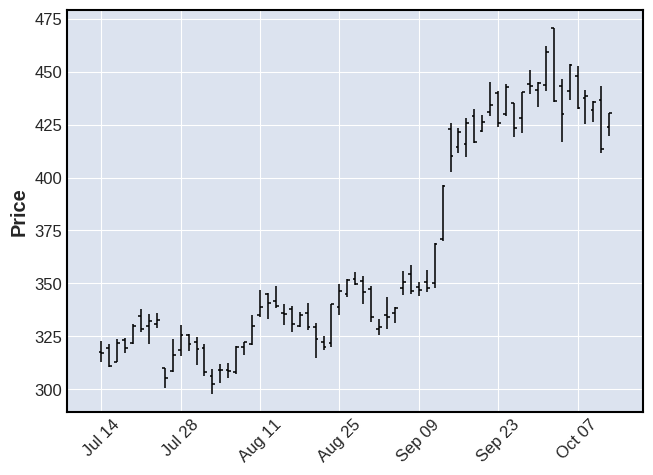

In [18]:
!pip install mplfinance --quiet
import mplfinance as mpf

mpf.plot(df)

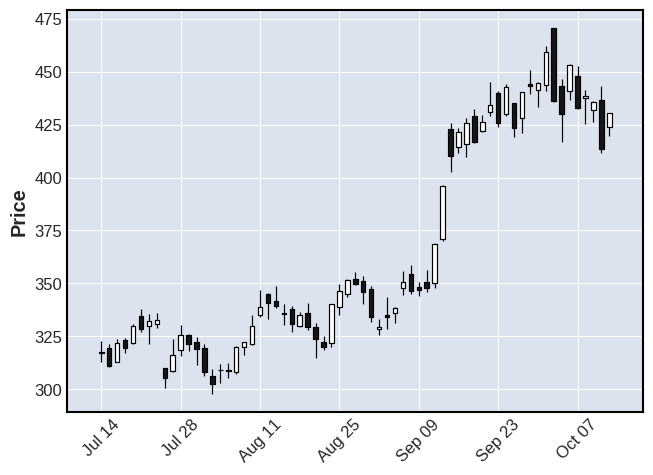

In [19]:
mpf.plot(df,type='candle')

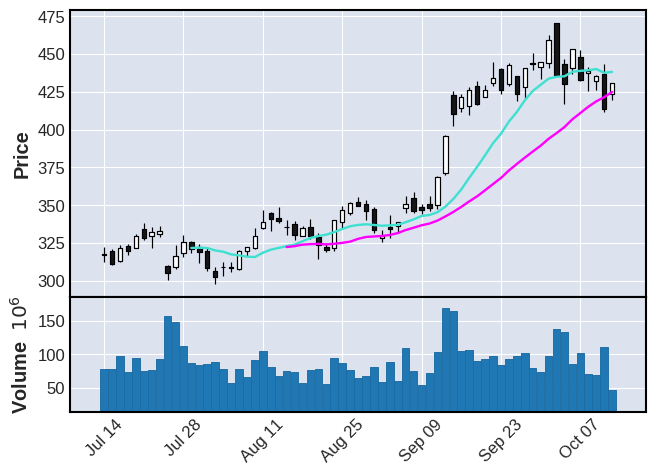

In [20]:
mpf.plot(df,type='candle',mav=(12,24),volume=True)

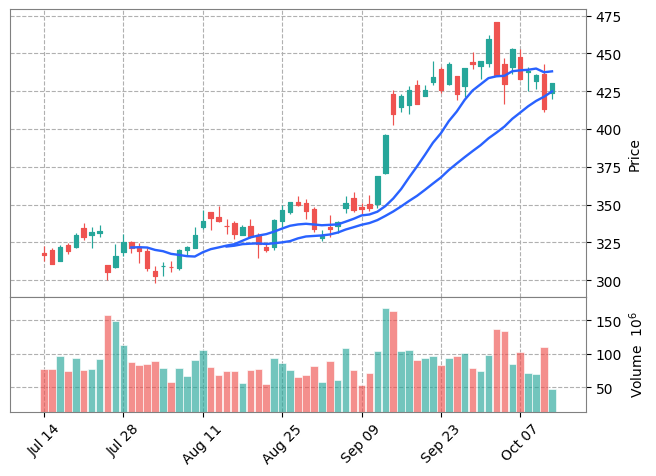

In [21]:
mpf.plot(df,type='candle',mav=(12,24),volume=True, style = "tradingview")

/usr/local/lib/python3.12/dist-packages/mplfinance/_utils.py:129: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/usr/local/lib/python3.12/dist-packages/mplfinance/_utils.py:130: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/usr/local/lib/python3.12/dist-packages/mplfinance/_utils.py:131: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



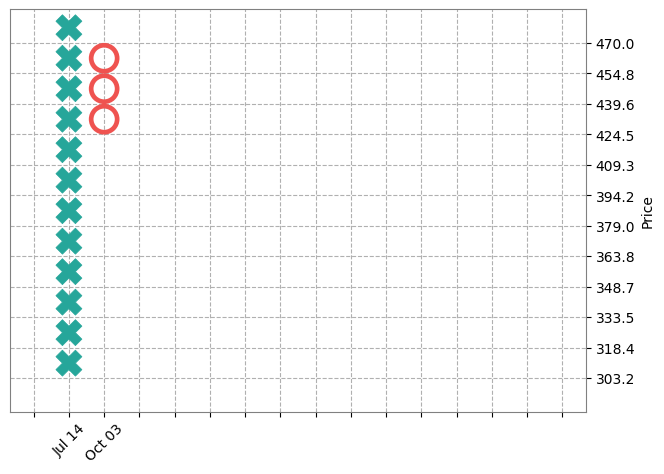

In [22]:
mpf.plot(df,type='pnf', style = "tradingview")

In [23]:
mpf.available_styles()

['binance',
 'binancedark',
 'blueskies',
 'brasil',
 'charles',
 'checkers',
 'classic',
 'default',
 'ibd',
 'kenan',
 'mike',
 'nightclouds',
 'sas',
 'starsandstripes',
 'tradingview',
 'yahoo']